In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.offline as py
import warnings
import pycountry
warnings.filterwarnings('ignore')

py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
PATH = 'DATA/athlete_events.csv'
data = pd.read_csv(PATH)
data.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [4]:
data.shape

(271116, 15)

In [3]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


The dataset has the following features:

ID - Уникальный номер атлета   
Name - Имя атлета   
Sex - Пол Атлета   
Age - Возраст   
Height - Рост   
Weight - Вес   
Team - Название команды   
NOC - Код НОК  
Games - Год/Время года   
Year - Год   
Season - Летние или зимние   
City - Место проведения   
Sport - Вид спорта   
Event - событие  
Medal - Медаль   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x108e49490>,
      dtype=object)

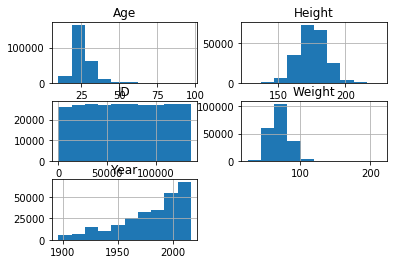

In [7]:
data.hist()

## Корреляция численных признаков

In [9]:
data.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.003631,-0.011141,-0.009176,0.011885
Age,-0.003631,1.000000,0.138246,0.212069,-0.115137
Height,-0.011141,0.138246,1.000000,0.796213,0.047578
Weight,-0.009176,0.212069,0.796213,1.000000,0.019095
Year,0.011885,-0.115137,0.047578,0.019095,1.000000


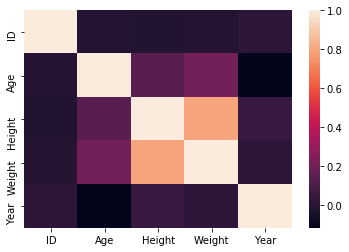

In [34]:
# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

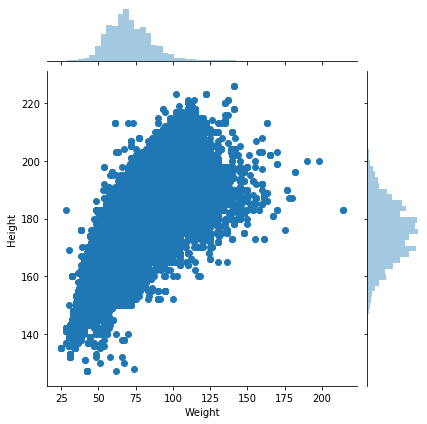

In [32]:
sns.jointplot(x='Weight', y='Height', data=data)

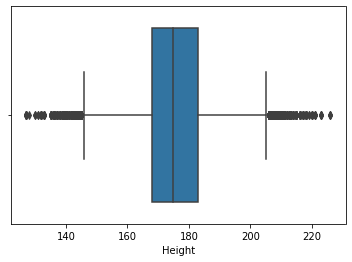

In [11]:
tips = sns.load_dataset("tips")
sns.boxplot(x=data["Height"])


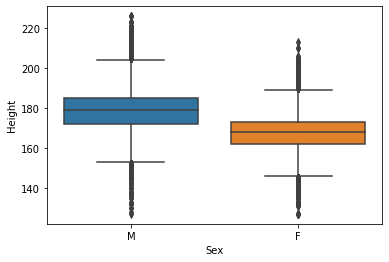

In [20]:
sns.boxplot(x="Sex", y="Height", data=data)

([<matplotlib.patches.Wedge at 0x13be74050>,
 [Text(0.5416287540153236, 0.9574122898855061, 'Gold'),
  Text(-1.099775232453987, -0.022235963680029166, 'Bronze'),
  Text(0.5608717034142483, -0.946267896691629, 'Silver')])

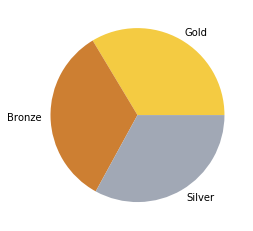

In [31]:
colors = ['#f4cb42', '#cd7f32', '#a1a8b5']
medal_counts = data.Medal.value_counts(sort=True)
labels = medal_counts.index
values = medal_counts.values

plt.pie(medal_counts, labels=labels, colors=colors)